## Logistic Regression- Adult Data

#### Problem Statement  
Prediction task is to determine whether a person makes over 50K a year.

Listing of attributes:

>50K, <=50K.

Age: continuous. 

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

Fnlwgt: continuous.

Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

Education-num: continuous.

Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op Inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

Sex: Female, Male.

Capital-gain: continuous.

Capital-loss: continuous.

Hours-per-week: continuous.

Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
# Importing the Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
adult_data=pd.read_csv(r"C:\Users\jaina gosalia\Desktop\Imarticus python\Logistic Regression\Adult data\adult_data.csv",header=None, delimiter=" *, *")

In [4]:
adult_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# Changing the column name

adult_data.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

* Since the data has missing headers we are assigning the columns name here

In [6]:
#Calling the data to check if the values are assigned 

adult_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Look at the data we infere that
* There are numeric as well as categorical data
* Here we see that Education has 2 column from which we can drop one later 
* Final weight will be dropped - Since it is calculated variable and does hold has much importance hence we will not include it as a part of feature selection 
* capital gain and capital loss have a lot of 0
* Race , relationship are not very imp so we will keep it as of now and make the models and see if we want to apply feature selection later

In [7]:
# General description of the data

print('Data shape: ', adult_data.shape)
print()
print('Data types: ','\n',adult_data.dtypes)
print()
print('Description: ','\n',adult_data.describe(include="all"))

Data shape:  (32561, 15)

Data types:  
 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Description:  
                  age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+

Here we observe that the 
* Shape of the data is 32561 rows and 15 columns
* We have mix data type i.e. int64 and object

### Process the data

In [8]:
adult_df = pd.DataFrame.copy(adult_data)

We created copy of data for comparison purposes

In [9]:
adult_df.drop(["education","fnlwgt"],axis=1,inplace = True)

Dropping the columns which are irrelevant which is
* Education
* Fnlwqt 


In [10]:
adult_df.shape

(32561, 13)

Here we can see that Column count has been reduced by 2 therefore we can state that education and fnlgwt have been successfullly dropped

In [11]:
# Finding the missing values 

In [12]:
adult_df.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Here we have no missing values but according to the data description we get to know that missing values are in the form of "?"

In [13]:
# Checking data type of numberic data if they any anomaly

In [14]:
adult_df.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

We conclude that are there are no anomaly

In [15]:
# Checking for special character "?" in the data

In [16]:
for i in adult_df.columns:
    print({i:adult_df[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

Here we can observe that workclass, occupation and native country have "?" - mising values

In [17]:
# checking for duplicate data

In [18]:
adult_df.duplicated().sum()

3465

Here we see there are 3465 duplicate records

In [19]:
adult_df.drop_duplicates(inplace=True)

In [20]:
# Checking if duplicates has records has been dropped 

In [21]:
adult_df.shape

(29096, 13)

Before dropping anything the shape was: 32561, 15 <br>
After dropping: 29096,13
* Therefore we can claim that duplicates values has been dropped

In [22]:
# Replacing "?" with NaN to get count of missing value 

In [23]:
adult_df.replace("?",np.nan,inplace=True)

In [24]:
# Checking if the values are replaced 

In [25]:
adult_df.isnull().sum()

age                  0
workclass         1632
education_num        0
marital_status       0
occupation        1639
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     580
income               0
dtype: int64

Here we can see that 
* Workclass has 1632 missing values
* Occupation has 1639 missing values
* Native_country has 580 missing values

Hence we can conclude that values has been replaced

In [26]:
# Replacing the missing value with mode 

for value in ["workclass","occupation","native_country"]:
    adult_df[value].fillna(adult_df[value].mode()[0],inplace=True)

In [27]:
adult_df.workclass.mode()[0]

'Private'

In [28]:
adult_df.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Here we can see that the values have changed successfully

In [29]:
adult_df.columns


Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [30]:
adult_df.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [31]:
adult_num = ['age','education_num',"capital_gain","capital_loss","hours_per_week"]

Since box plot can only be created on int dtype

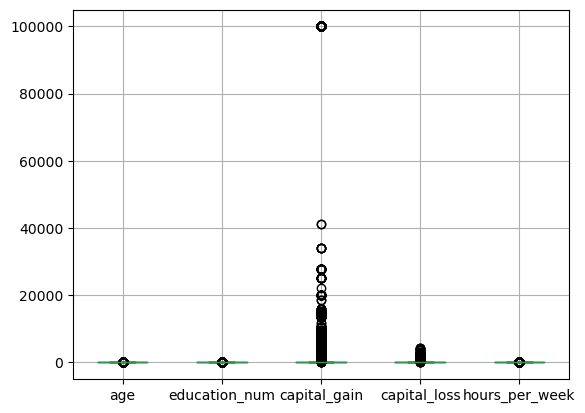

In [32]:
#Checking with the help Boxplot 
adult_df.boxplot()
plt.show()

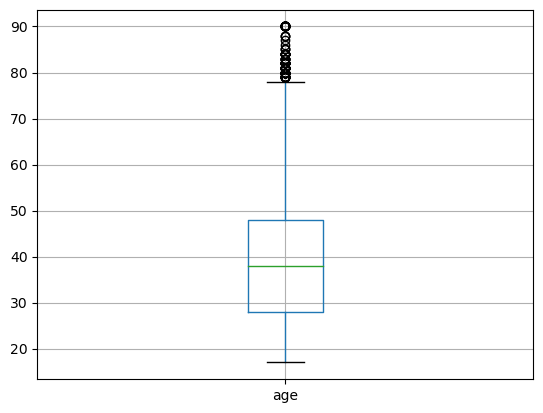

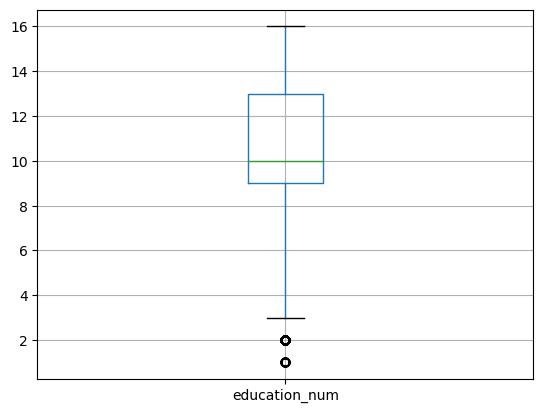

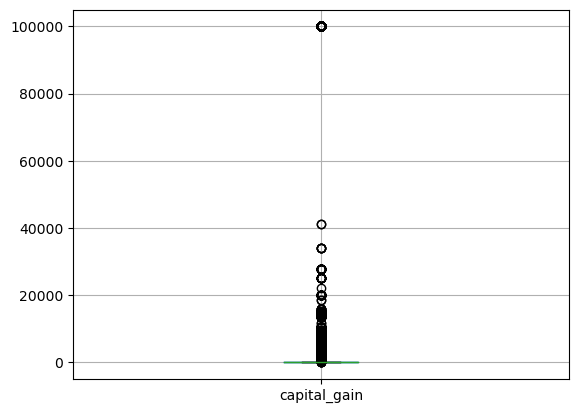

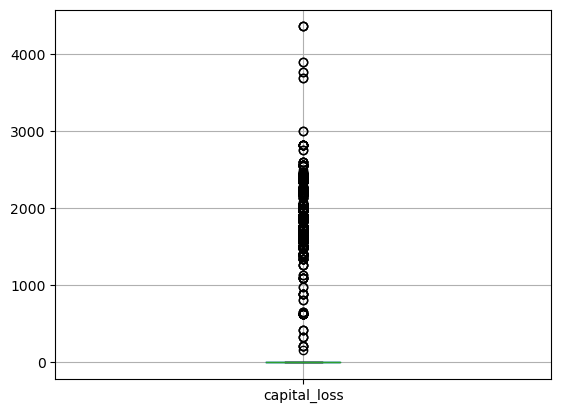

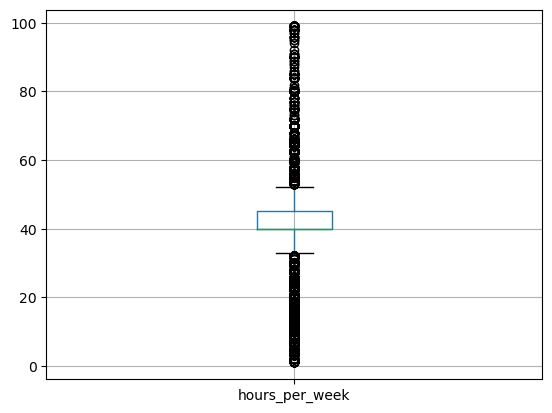

In [33]:
for i in adult_num:
    adult_df.boxplot(column=i)
    plt.show()

We can observe that there are a few outliers in the data<br>
But we also observe that outliers are clustered in nature so elimination of any outlier will lead to data loss

Hence we will ignore the outliers<Br>
The 1st assumption has been successfully met

### Pre-processing the data

##### Here we are converting categorical datatype into numerical datatype

In [34]:
colname=[]
for x in adult_df.columns:
    if adult_df[x].dtype=="object":
        colname.append(x)
print("Columns with 'Object' as their data type are:",colname)

Columns with 'Object' as their data type are: ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [35]:
from sklearn.preprocessing import LabelEncoder 

le=LabelEncoder()
    
for i in colname:
    adult_df[i]=le.fit_transform(adult_df[i])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', i)
    print('mapping', le_name_mapping)
    

Feature workclass
mapping {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}
Feature marital_status
mapping {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
Feature occupation
mapping {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
Feature relationship
mapping {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
Feature race
mapping {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}
Feature sex
mapping {'Female': 0, 'Male': 1}
Feature native_country
mapping {'Cambodia': 0, 'Canada'

    Here we can see that all the Categorical data has been converted into Numerical Datatype

In [36]:
X= adult_df.values[:,0:-1]  #---> 0 to -2
Y= adult_df.values[:,-1]

In [37]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaler.fit(X)
X= scaler.transform(X)

In [38]:
print(X)
print(Y)

[[-0.01836354  2.50168388  1.09532824 ... -0.22918623 -0.05008321
   0.27686061]
 [ 0.78532337  1.63827296  1.09532824 ... -0.22918623 -2.17019141
   0.27686061]
 [-0.09142599 -0.08854888 -0.41687439 ... -0.22918623 -0.05008321
   0.27686061]
 ...
 [-0.8951129  -0.08854888  0.71727758 ... -0.22918623 -0.20712826
   0.27686061]
 [ 1.36982294 -0.08854888 -0.41687439 ... -0.22918623 -0.05008321
   0.27686061]
 [ 0.93144826  0.77486204 -0.41687439 ... -0.22918623 -0.05008321
   0.27686061]]
[0 0 0 ... 0 0 1]


In [39]:
X.shape

(29096, 12)

In [40]:
Y.shape

(29096,)

In [41]:
Y=Y.astype(int)

In [42]:
Y.dtype

dtype('int32')

In [43]:
#Split the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [44]:
print("Shape of X train:",X_train.shape)
print("Shape of X test :",X_test.shape)
print("Shape of Y train:",Y_train.shape)
print("Shape of Y test :",Y_test.shape,"\n")
print("percentange of training data",X_train.shape[0]/X.shape[0]*100)

Shape of X train: (20367, 12)
Shape of X test : (8729, 12)
Shape of Y train: (20367,)
Shape of Y test : (8729,) 

percentange of training data 69.99931262029145


Here with the help of shape we can see that the data has been spilt for train and test

## Logistic Regression
#### Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class. It is used for classification algorithms its name is logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression 

# create a model

classifier = LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 1 0 ... 0 0 0]


In [46]:
print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0),

In [47]:
print("Beta coefficient","\n")
print(list(zip(adult_df.columns[:-1],classifier.coef_.ravel())))
print()
print("Intercept/beta 0 ",classifier.intercept_)

Beta coefficient 

[('age', 0.4057793438768481), ('workclass', -0.12137147664172941), ('education_num', 0.8485779019763946), ('marital_status', -0.3287470332123412), ('occupation', 0.006689311450831139), ('relationship', -0.1822354396676343), ('race', 0.11322541206573733), ('sex', 0.4139213236936009), ('capital_gain', 2.4584113811907695), ('capital_loss', 0.2982110884676926), ('hours_per_week', 0.3583121147226164), ('native_country', 0.036966838258024)]

Intercept/beta 0  [-1.41602839]


From above we can infer the relation between dependent and independent variable

Predicting the probability of value belonging to class one or class zero

In [48]:
# Proba function is to check the probability of which class it belongs
y_pred_class=classifier.predict_proba(X_test)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix: ","\n",cfm,"\n" )

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Score: ","\n",acc,"\n")

cls=classification_report(Y_test,Y_pred)
print("Classification Report: ","\n",cls)

Confusion Matrix:  
 [[6178  372]
 [1211  968]] 

Accuracy Score:  
 0.8186504754267384 

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.44      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.69      0.72      8729
weighted avg       0.81      0.82      0.80      8729



###### Confusion Matrix
* Here we observe that 6178 values from class 0 were predicted properly where as 372 were predicted wrong
* For class 1 we see that 968 values were predicted properly where as 1211 were wrong


###### Accuracy Score 
* Here the Accuracy Score is 0.8186504754267384 


###### Classification Report  
* Recall values:<br>
   Class 0 : 94%<br>
   Class 1 : 44%
   
   
* F1 Score:<br>
   Class 0 : 89%
   Class 1 : 55%

In [50]:
# Creating a loop to not perform tuning individually

for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_class[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1617  , type 2 error : 973  , type 1 error: 644
Errors at threshold  0.41000000000000003 : 1602  , type 2 error : 995  , type 1 error: 607
Errors at threshold  0.42000000000000004 : 1595  , type 2 error : 1021  , type 1 error: 574
Errors at threshold  0.43000000000000005 : 1591  , type 2 error : 1042  , type 1 error: 549
Errors at threshold  0.44000000000000006 : 1588  , type 2 error : 1072  , type 1 error: 516
Errors at threshold  0.45000000000000007 : 1583  , type 2 error : 1097  , type 1 error: 486
Errors at threshold  0.4600000000000001 : 1582  , type 2 error : 1126  , type 1 error: 456
Errors at threshold  0.4700000000000001 : 1585  , type 2 error : 1151  , type 1 error: 434
Errors at threshold  0.4800000000000001 : 1582  , type 2 error : 1174  , type 1 error: 408
Errors at threshold  0.4900000000000001 : 1586  , type 2 error : 1194  , type 1 error: 392
Errors at threshold  0.5000000000000001 : 1583  , type 2 error : 1211  , type 1 error: 372
Errors at t

Checking for the lowest threshold value (here it is 1576 but type 2 error is 1288 which is more)  
Checking for 2nd lowest threshold value (here it is 1582 )  
Checking for the lowest Type 2 error wrt lowest threshold  
Therefore we take 0.46 threshold value into consideration

In [51]:
y_pred_considered=[]
for value in y_pred_class[:,1]:
    if value > 0.46:
        y_pred_considered.append(1)
    else:
        y_pred_considered.append(0)
#print(y_pred_class)

cfm=confusion_matrix(Y_test,Y_pred)
print("Previous Confusion Matrix: ","\n",cfm,"\n" )

cfm= confusion_matrix(Y_test,y_pred_considered) #always Y_Actual first and later Y_pred
print("Confusion Matrix: ","\n",cfm,"\n")

acc=accuracy_score(Y_test,Y_pred)
print("Previous Accuracy Score: ","\n",acc,"\n")

acc= accuracy_score(Y_test,y_pred_considered)
print("Accuracy of model: ","\n",acc,"\n")

cls= classification_report(Y_test,y_pred_considered)
print("Classification Report: ","\n",cls)

Previous Confusion Matrix:  
 [[6178  372]
 [1211  968]] 

Confusion Matrix:  
 [[6094  456]
 [1126 1053]] 

Previous Accuracy Score:  
 0.8186504754267384 

Accuracy of model:  
 0.8187650360866079 

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.93      0.89      6550
           1       0.70      0.48      0.57      2179

    accuracy                           0.82      8729
   macro avg       0.77      0.71      0.73      8729
weighted avg       0.81      0.82      0.81      8729



###### Confusion Matrix
* Here we observe that 6094 values from class 0 were predicted properly where as 456 were predicted wrong
* For class 1 we see that 1053 values were predicted properly where as 1126 were wrong


###### Accuracy Score 
* Here the Accuracy Score is  0.8187650360866079  


###### Classification Report  
* Recall values:<br>
   Class 0 : 93%<br>
   Class 1 : 48%
   
   
* F1 Score:<br>
   Class 0 : 89%
   Class 1 : 57%

###### Conclusion

Hence we have built a model to predict the income of various people based on different factors like 'age', 'workclass', 'education', 'marital status', 'occupation', 'relationship', 'race', 'sex', 'capital gain', 'capital loss', 'hours per week' and 'native country' of 81.87% accuracy, using Classification Logistic Regression

### Testing

In [52]:
adult_df_test= pd.read_csv(r"C:\Users\jaina gosalia\Desktop\Imarticus python\Logistic Regression\Adult data\adult_test.csv",header=None, delimiter=" *, *")

In [53]:
adult_df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [54]:
adult_df_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']


In [55]:
adult_df_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [56]:

print('Data shape -', adult_df_test.shape)
print()
print('Data types','\n',adult_df_test.dtypes)



Data shape - (16281, 15)

Data types 
 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [57]:
#Finding the null values missing value
adult_df_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [58]:
#Feature Selection
adult_df_test.drop(["fnlwgt","education"],axis=1,inplace=True)

In [59]:
# Checking for anomaly in the data 

print('Data types','\n',adult_df_test.dtypes)

Data types 
 age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


Here we can see that there are few anomaly in data

* From here we get that workclass, occupation and native country have "?" mising values

###### NEVER DROP DUPLICATE DATA IN TESTING PART

In [60]:
for i in adult_df_test.columns:
    print({i:adult_df_test[i].unique()})

{'age': array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87], dtype=int64)}
{'workclass': array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)}
{'occupation': array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tec

In [61]:
# Replacing "?" with none value
adult_df_test.replace("?",np.nan,inplace=True)

In [62]:
adult_df_test.isnull().sum()
# Checking for the null value after replacing 

age                 0
workclass         963
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

Here we observe we have 
* 872 values missing in workclass
* 875 values in occupation
* 273 in native country

In [63]:
for value in ["workclass","occupation","native_country"]:
    adult_df_test[value].fillna(adult_df_test[value].mode()[0] ,inplace=True)

In [64]:
#Checking the null values after replacing them with mode value

adult_df_test.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [65]:
colname=[]
for x in adult_df_test.columns:
    if adult_df_test[x].dtype=="object":
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [66]:
from sklearn.preprocessing import LabelEncoder 

le=LabelEncoder()

for i in colname:
    adult_df_test[i]=le.fit_transform(adult_df_test[i])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)


Feature income
mapping {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}
Feature income
mapping {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
Feature income
mapping {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
Feature income
mapping {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
Feature income
mapping {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}
Feature income
mapping {'Female': 0, 'Male': 1}
Feature income
mapping {'Cambodia': 0, 'Canada': 1, 'China': 2, 'Columb

In [67]:
X_test_new= adult_df_test.values[:,:-1]  
Y_test_new= adult_df_test.values[:,-1]

In [68]:
print("New X variable: ","\n",X_test_new,"\n\n")
print("New Y variable: ","\n",Y_test_new)

New X variable:  
 [[25  3  7 ...  0 40 37]
 [38  3  9 ...  0 50 37]
 [28  1 12 ...  0 40 37]
 ...
 [38  3 13 ...  0 50 37]
 [44  3 13 ...  0 40 37]
 [35  4 13 ...  0 60 37]] 


New Y variable:  
 [0 0 1 ... 0 0 1]


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
#scaler.fit(X_test_new)
X_test_new= scaler.transform(X_test_new)

print(X_test_new)

[[-1.0412378  -0.08854888 -1.1729757  ... -0.22918623 -0.05008321
   0.1199519 ]
 [-0.09142599 -0.08854888 -0.41687439 ... -0.22918623  0.73514205
   0.1199519 ]
 [-0.82205046 -1.81537072  0.71727758 ... -0.22918623 -0.05008321
   0.1199519 ]
 ...
 [-0.09142599 -0.08854888  1.09532824 ... -0.22918623  0.73514205
   0.1199519 ]
 [ 0.34694869 -0.08854888  1.09532824 ... -0.22918623 -0.05008321
   0.1199519 ]
 [-0.31061333  0.77486204  1.09532824 ... -0.22918623  1.52036731
   0.1199519 ]]


In [71]:
Y_test_new=Y_test_new.astype(int)

In [72]:
y_pred_prob = classifier.predict_proba(X_test_new)
print(y_pred_prob)

[[0.97513996 0.02486004]
 [0.79313172 0.20686828]
 [0.67691101 0.32308899]
 ...
 [0.51306005 0.48693995]
 [0.22085769 0.77914231]
 [0.49368818 0.50631182]]


In [73]:
y_pred_class_test=[]
for value in y_pred_prob[:,1]:
    if value > 0.46:
        y_pred_class_test.append(1)
    else:
        y_pred_class_test.append(0)
print(y_pred_class_test)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm= confusion_matrix(Y_test_new,y_pred_class_test)
print("Confusion Matrix: ","\n",cfm,"\n")

acc= accuracy_score(Y_test_new,y_pred_class_test)
print("Accuracy of model: ",acc,"\n")

cls= classification_report(Y_test_new,y_pred_class_test)
print("Classification Report: ","\n\n",cls)

Confusion Matrix:  
 [[11617   818]
 [ 2029  1817]] 

Accuracy of model:  0.8251335913027456 

Classification Report:  

               precision    recall  f1-score   support

           0       0.85      0.93      0.89     12435
           1       0.69      0.47      0.56      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.70      0.73     16281
weighted avg       0.81      0.83      0.81     16281



Looking at the accuracy score one might infer that the model is a good model, but looking closely at the recall value for class 1, we can say that the model is not the best and can be improved further by applying different algorithms.